# Классификация изображений

Фиксируем последовательности для воспроизведения данных:

In [1]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

Датасет MNIST рукописных цифр от 0 до 9:

In [2]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [3]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Типы данных:

In [4]:
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

Преобразуем данные в дробные числа:

In [5]:
X_train = X_train.float()
X_test = X_test.float()

Размерности:

In [6]:
X_train.shape, X_test.shape

#Объекты это тензоры размерности 28 на 28 элементов

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [7]:
y_train.shape, y_test.shape

(torch.Size([60000]), torch.Size([10000]))

Визуализация входных картинок:

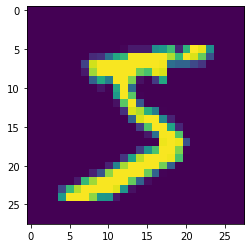

tensor(5)


In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

Растянем двумерные тензоры картинок функцией .reshape в одну вектор-строку:

In [9]:
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

Полносвязная нейронная сеть:

In [10]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10) 
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x
    
mnist_net = MNISTNet(100)

Видит ли torch GPU:

In [11]:
torch.cuda.is_available()

False

Занята ли видеокарта вычислениями:

In [12]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



Перекладываем параметры нейросети на видеокарту:

In [13]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mnist_net = mnist_net.to(device)
list(mnist_net.parameters())

[Parameter containing:
 tensor([[-0.0003,  0.0192, -0.0294,  ...,  0.0219,  0.0037,  0.0021],
         [-0.0198, -0.0150, -0.0104,  ..., -0.0203, -0.0060, -0.0299],
         [-0.0201,  0.0149, -0.0333,  ..., -0.0203,  0.0012,  0.0080],
         ...,
         [ 0.0221,  0.0258, -0.0088,  ..., -0.0141,  0.0051, -0.0318],
         [-0.0217, -0.0136,  0.0185,  ..., -0.0012, -0.0012, -0.0017],
         [ 0.0142,  0.0089, -0.0053,  ...,  0.0311, -0.0181,  0.0020]],
        requires_grad=True), Parameter containing:
 tensor([-3.5402e-02,  1.8178e-02, -2.1709e-02, -1.1839e-02,  4.8722e-03,
         -1.0492e-02, -1.9008e-02,  2.6994e-02, -3.4899e-02,  1.0381e-02,
         -3.5228e-02, -5.6381e-03, -2.0134e-02, -3.0264e-02, -1.3289e-02,
          2.5346e-02, -1.0797e-02,  2.1568e-03,  4.3630e-03, -2.1916e-02,
          2.2670e-02, -1.5766e-02,  3.4906e-02, -2.3063e-02, -6.8216e-03,
          2.7051e-02, -1.3991e-02,  9.7218e-03, -9.9075e-04,  1.6625e-03,
          2.3455e-02, -2.5294e-02,  4.802

Функция потерь - кросс-энтропия (так как классификация);



Оптимизатор - метод градиентного спуска Adam:


В CrossEntropyLoss() спрятан Софтмакс, то есть это функция активации и функция потерь.

In [14]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

# Обучение:



Картинки тоже перекладываем на GPU.

In [15]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

train_accuracy_history = []
train_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(200):
    order = np.random.permutation(len(X_train))
    train_preds = torch.zeros([X_train.shape[0], 10], dtype=torch.float)
    train_batch_loss_history = []

    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = mnist_net.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        train_batch_loss_history.append(loss_value.tolist())
        train_preds[batch_indexes] = preds.cpu()

        optimizer.step()

    test_preds = mnist_net.forward(X_test)
    test_loss = loss(test_preds, y_test).cpu().detach().numpy()
    test_loss_history.append(loss(test_preds, y_test).cpu().detach().numpy())
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().cpu().detach().numpy()
    test_accuracy_history.append(accuracy)

    train_loss = np.mean(train_batch_loss_history)
    train_loss_history.append(train_loss)

    accuracy2 = (train_preds.argmax(dim=1) == y_train).float().mean().cpu().detach().numpy()
    train_accuracy_history.append(accuracy2)

    print('{:4d} tr_loss:{:.4f} val_loss:{:.4f} tr_acc:{:.4f} val_acc:{:.4f}'.format(
        epoch,
        train_loss,
        test_loss,
        accuracy2.tolist(),
        accuracy.tolist()))

   0 tr_loss:0.5804 val_loss:0.3485 tr_acc:0.8643 val_acc:0.9097
   1 tr_loss:0.3261 val_loss:0.3098 tr_acc:0.9100 val_acc:0.9095
   2 tr_loss:0.2916 val_loss:0.2836 tr_acc:0.9158 val_acc:0.9201
   3 tr_loss:0.2740 val_loss:0.2746 tr_acc:0.9197 val_acc:0.9211
   4 tr_loss:0.2648 val_loss:0.2325 tr_acc:0.9227 val_acc:0.9322
   5 tr_loss:0.2542 val_loss:0.2530 tr_acc:0.9254 val_acc:0.9254
   6 tr_loss:0.2463 val_loss:0.2579 tr_acc:0.9269 val_acc:0.9251
   7 tr_loss:0.2343 val_loss:0.2345 tr_acc:0.9305 val_acc:0.9311
   8 tr_loss:0.2405 val_loss:0.2489 tr_acc:0.9277 val_acc:0.9263
   9 tr_loss:0.2422 val_loss:0.2269 tr_acc:0.9280 val_acc:0.9303
  10 tr_loss:0.2217 val_loss:0.2246 tr_acc:0.9324 val_acc:0.9319
  11 tr_loss:0.2165 val_loss:0.2386 tr_acc:0.9358 val_acc:0.9289
  12 tr_loss:0.2144 val_loss:0.2214 tr_acc:0.9363 val_acc:0.9326
  13 tr_loss:0.2250 val_loss:0.2192 tr_acc:0.9313 val_acc:0.9316
  14 tr_loss:0.2181 val_loss:0.2051 tr_acc:0.9330 val_acc:0.9377
  15 tr_loss:0.2074 val_l

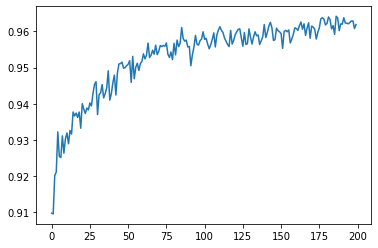

In [19]:
plt.plot(test_accuracy_history);

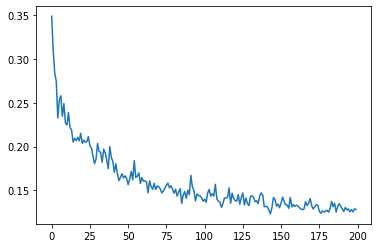

In [20]:
plt.plot(test_loss_history);

Запустите код из видео на GPU. В последнем шаге мы рисовали график accuracy и loss на валидации. А что с ними происходит на train'е?

Постройте на одном графике loss для train и validation.
Правда ли, что loss на train и validation падает одинаково быстро и выходит на одинаковое значение, или же у нас есть переобучение?
Ведет ли увеличение количества эпох (40 эпох -> 200 эпох) к улучшению метрик на валидации?
Замерьте время вычисления 100 эпох на CPU и на GPU. Какое ускорение вы наблюдаете?
Замедляет ли torch.backends.cudnn.deterministic = True обучение на практике? Если да, то насколько?
Попробуйте разные методы градиентного спуска, которые были в лекции. Как выбор градиентного спуска влияет на accuracy? Для уверенности лучше проводить один эксперимент 3-5 раз на разных random seed: так вы поймете, действительно ли сказывается влияние метода или дело в случайности.

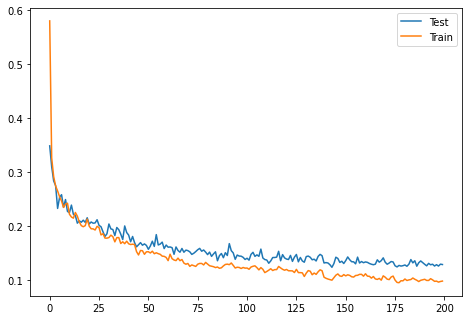

In [21]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(test_loss_history, label="Test")
ax.plot(train_loss_history, label="Train")

ax.legend();

Как было сказано в предыдущем уроке, полносвязный слой может быть представлен как матричное умножение матрицы входов (X) и матрицы весов нейронов слоя (W), плюс вектор bias'ов слоя (b). 

В документации к классу torch.nn.Linear (полносвязному слою) написано следующее: Applies a linear transformation to the incoming data: $y = xA^T + b$. А здесь – это то, как PyTorch хранит веса слоя. Но чтобы эта матрица совпала с W из предыдущего урока, нужно её сперва транспонировать.

Давайте реализуем функциональность torch.nn.Linear и сверим с оригиналом!

Пусть у нас будет 1 объект x на входе с двумя компонентами. Его мы передадим в полносвязный слой с 3-мя нейронами и получим, соотсветственно, 3 выхода. После напишем эту же функциональность с помощью матричного умножения. 



In [31]:
import torch

# Сперва создадим тензор x:
x = torch.tensor([[10., 20.]])

# Оригинальный полносвязный слой с 2-мя входами и 3-мя нейронами (выходами):
fc = torch.nn.Linear(2, 3)

# Веса fc-слоя хранятся в fc.weight, а bias'ы соответственно в fc.bias
# fc.weight и fc.bias по умолчанию инициализируются случайными числами

# Давайте проставим свои значения в веса и bias'ы:
w = torch.tensor([[11., 12.], [21., 22.], [31., 32]])
fc.weight.data = w

b = torch.tensor([[31., 32., 33.]])
fc.bias.data = b

# Получим выход fc-слоя:
fc_out = fc(x)

# Попробуем теперь получить аналогичные выходы с помощью матричного перемножения:
# @ - перемножение матриц
# .T - транспонирование
fc_out_alternative = x @ w.T + b

# Проверка осуществляется автоматически вызовом функции
print(fc_out == fc_out_alternative)

tensor([[True, True, True]])


В предыдущем шаге мы написали функцию, эмулирующую fc-слой. Проверим, что по ней правильно считается градиент. 

Функцию backward() в PyTorch можно посчитать только от скалярной функции (выход из такой функции – одно число). Это логично, так как loss-функция выдает всегда одно число. Но fc-слой, который мы проэмулировали, имел 3 выхода. Предлагаем их просуммировать, чтобы получить в итоге скалярную функцию. Заметим, впрочем, что можно было бы выбрать любую агрегирующую операцию, например умножение.

Дополните код так, чтобы градиент по весам и смещениям (bias) совпадал с аналогичным градиентом в вашей фунции.

Чем обусловлен полученный градиент? Изменится ли он, если мы подадим другие входы или другую инициализацию весов?



In [32]:
import torch

# Сперва создадим тензор x:
x = torch.tensor([[10., 20.]])

# Оригинальный полносвязный слой с 2-мя входами и 3-мя нейронами (выходами):
fc = torch.nn.Linear(2, 3)

# Веса fc-слоя хранятся в fc.weight, а bias'ы соответственно в fc.bias
# fc.weight и fc.bias по умолчанию инициализируются случайными числами

# Давайте проставим свои значения в веса и bias'ы:
w = torch.tensor([[11., 12.], [21., 22.], [31., 32]])
fc.weight.data = w

b = torch.tensor([[31., 32., 33.]])
fc.bias.data = b

# Получим выход fc-слоя:
fc_out = fc(x)
# Просуммируем выход fc-слоя, чтобы получить скаляр:
fc_out_summed = fc_out.sum()

# Посчитаем градиенты формулы fc_out_summed:
fc_out_summed.backward()
weight_grad = fc.weight.grad
bias_grad = fc.bias.grad

# Ok, теперь воспроизведем вычисления выше но без fc-слоя:
# Проставим, что у "w" и "b" нужно вычислять градиенты (для fc-слоя это произошло автоматически):
w.requires_grad_(True)
b.requires_grad_(True)

# Получим выход нашей формулы:
our_formula = (x @ w.transpose(0, 1) + b).sum()

# Сделайте backward для нашей формулы:
our_formula.backward()

# Проверка осуществляется автоматически, вызовом функций:
print('fc_weight_grad:', weight_grad)
print('our_weight_grad:', w.grad)
print('fc_bias_grad:', bias_grad)
print('out_bias_grad:', b.grad)
# (раскомментируйте, если работаете над задачей локально)

fc_weight_grad: tensor([[10., 20.],
        [10., 20.],
        [10., 20.]])
our_weight_grad: tensor([[10., 20.],
        [10., 20.],
        [10., 20.]])
fc_bias_grad: tensor([[1., 1., 1.]])
out_bias_grad: tensor([[1., 1., 1.]])
